<a href="https://colab.research.google.com/github/Josh1313/-sales-propensity-models-/blob/main/DPL1_6_Propuesta_Clasificacion_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import time
import datetime

# Leer el archivo pickle
df = pd.read_pickle("/content/drive/MyDrive/TFM/pkl.data_TFM/MLDATA.pkl")

# Dividir los datos en características (X) y etiquetas (y)
X = df.drop('cluster2', axis=1)
y = df['cluster2']


# Codificar las etiquetas en valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Convertir las etiquetas a formato one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Crear el modelo de red neuronal
num_classes = len(label_encoder.classes_)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_std.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Contador
t = time.perf_counter()

# Entrenar el modelo
history = model.fit(
    X_train_std, y_train_cat,
    batch_size=512,
    epochs=20,
    validation_data=(X_test_std, y_test_cat),
    callbacks=[early_stopping]
)

elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print("Tiempo de entrenamiento:", elapsed_time)


Epoch 1/20
714/714 [==============================] - 4s 5ms/step - loss: 0.1089 - accuracy: 0.9736 - val_loss: 0.0077 - val_accuracy: 0.9984
Epoch 2/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0101 - accuracy: 0.9982 - val_loss: 0.0069 - val_accuracy: 0.9992
Epoch 3/20
714/714 [==============================] - 4s 5ms/step - loss: 0.0073 - accuracy: 0.9987 - val_loss: 0.0067 - val_accuracy: 0.9994
Epoch 4/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0048 - val_accuracy: 0.9996
Epoch 5/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9996
Epoch 6/20
714/714 [==============================] - 4s 6ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0056 - val_accuracy: 0.9996
Epoch 7/20
714/714 [==============================] - 3s 5ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0037 - val_accuracy: 0.9997
Epoch 

Rendimiento en el conjunto de entrenamiento:
Pérdida: 0.0005287490203045309
Exactitud: 0.9997836351394653
Rendimiento en el conjunto de prueba:
Pérdida: 0.0024356849025934935
Exactitud: 0.9996603727340698


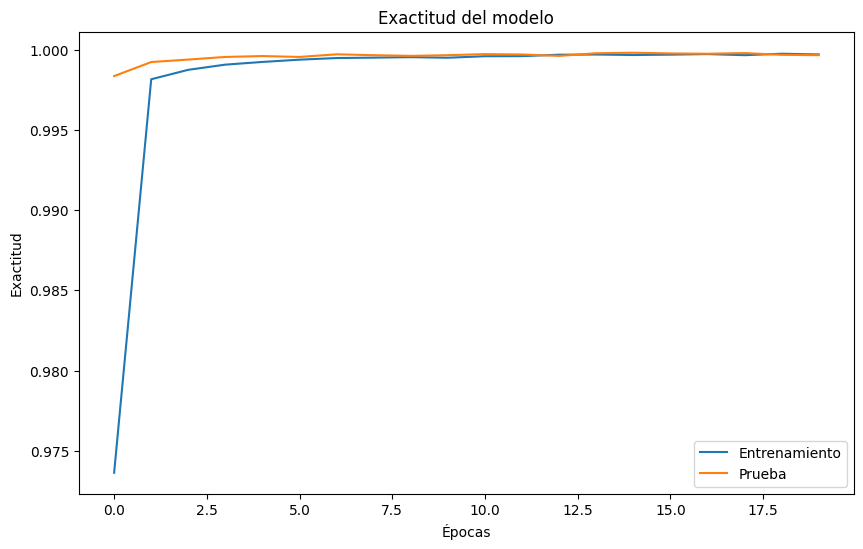

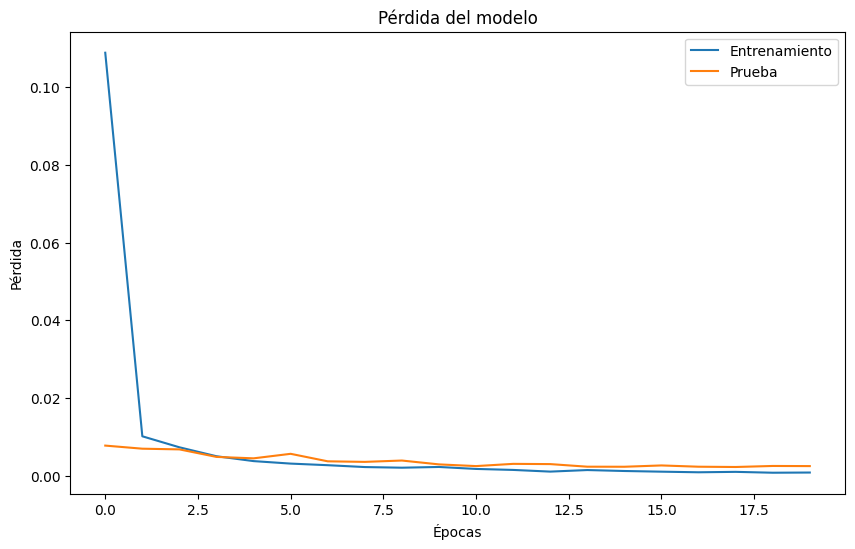

In [ ]:
import matplotlib.pyplot as plt

# Evaluar el modelo en el conjunto de entrenamiento y prueba
train_loss, train_accuracy = model.evaluate(X_train_std, y_train_cat, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_std, y_test_cat, verbose=0)

print("Rendimiento en el conjunto de entrenamiento:")
print("Pérdida:", train_loss)
print("Exactitud:", train_accuracy)

print("Rendimiento en el conjunto de prueba:")
print("Pérdida:", test_loss)
print("Exactitud:", test_accuracy)

# Visualizar las métricas de rendimiento
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Prueba')
plt.title('Exactitud del modelo')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Prueba')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [ ]:
y_train_prob = model.predict(X_train_std)
y_test_prob = model.predict(X_test_std)


2853/2853 [==============================] - 5s 2ms/step


In [ ]:
y_train_prob.shape

(365095, 4)

In [ ]:
y_test_prob.shape

(91274, 4)

In [ ]:
# Revertir el escalado de los datos
X_train_original = scaler.inverse_transform(X_train_std)
X_test_original = scaler.inverse_transform(X_test_std)

In [ ]:


# Supongamos que tienes las matrices X_train_original y X_test_original

# Convertir las matrices en DataFrames
X_train_original_df = pd.DataFrame(X_train_original, columns=X_train.columns)  # Reemplaza X_train.columns con las columnas reales
X_test_original_df = pd.DataFrame(X_test_original, columns=X_test.columns)     # Reemplaza X_test.columns con las columnas reales


In [ ]:
X_train_original_df.shape

(365095, 34)

In [ ]:
# Supongamos que tienes X_train_original_df y y_train_prob

# Crear un DataFrame con los resultados de las predicciones
results_train_df = pd.DataFrame(y_train_prob, columns=['Predicted_Label_1', 'Predicted_Label_2', 'Predicted_Label_3', 'Predicted_Label_4'])  # Ajusta las columnas según tus resultados

# Concatenar los resultados al DataFrame original
combined_train_df = pd.concat([X_train_original_df, results_train_df], axis=1)

In [ ]:
combined_train_df

,Unique_ID_client,duracion_meses,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,Cuenta easyMoney++,...,deceased_S,zona_Asia,zona_Europe,zona_Middle East,zona_North America,zona_South America,Predicted_Label_1,Predicted_Label_2,Predicted_Label_3,Predicted_Label_4
0,1513312.0,6.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.855200e-15,9.999999e-01,3.434464e-13,3.786824e-11
1,1513717.0,6.0,1.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.531953e-12,8.204619e-09,1.158118e-09,9.999999e-01
2,1059460.0,45.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,9.647372e-11,9.999999e-01,1.107368e-11,3.103283e-09
3,1350884.0,19.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,4.596941e-14,9.999999e-01,1.503004e-13,9.429357e-11
4,1453216.0,9.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,9.704642e-18,2.945237e-10,3.337209e-12,9.999999e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365090,1323703.0,20.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.212569e-14,1.000000e+00,9.944982e-14,8.542763e-11
365091,1452035.0,9.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,9.552947e-18,2.944232e-10,3.246996e-12,1.000000e+00
365092,1169768.0,33.0,1.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,8.763884e-11,1.000000e+00,1.211850e-12,7.899357e-09
365093,1187988.0,32.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,5.326423e-15,8.107591e-10,1.676682e-12,1.000000e+00


In [ ]:
combined_train_df['short_term_deposit'] = combined_train_df['short_term_deposit'].astype(int)
combined_train_df['Unique_ID_client'] = combined_train_df['Unique_ID_client'].astype(int)
combined_train_df['Predicted_Label_1'] = combined_train_df['Predicted_Label_1'].astype(float)


In [ ]:
combined_train_df

,Unique_ID_client,duracion_meses,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,Cuenta easyMoney++,...,deceased_S,zona_Asia,zona_Europe,zona_Middle East,zona_North America,zona_South America,Predicted_Label_1,Predicted_Label_2,Predicted_Label_3,Predicted_Label_4
0,1513312,6.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.855200e-15,9.999999e-01,3.434464e-13,3.786824e-11
1,1513717,6.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.531953e-12,8.204619e-09,1.158118e-09,9.999999e-01
2,1059460,45.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,9.647372e-11,9.999999e-01,1.107368e-11,3.103283e-09
3,1350884,19.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,4.596941e-14,9.999999e-01,1.503004e-13,9.429357e-11
4,1453216,9.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,9.704642e-18,2.945237e-10,3.337209e-12,9.999999e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365090,1323703,20.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.212569e-14,1.000000e+00,9.944982e-14,8.542763e-11
365091,1452035,9.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,9.552947e-18,2.944232e-10,3.246996e-12,1.000000e+00
365092,1169768,33.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,8.763884e-11,1.000000e+00,1.211850e-12,7.899357e-09
365093,1187988,32.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,5.326423e-15,8.107591e-10,1.676682e-12,1.000000e+00


In [ ]:
# Supongamos que tienes un DataFrame llamado 'df'

# Encontrar la columna con el valor máximo en cada fila
combined_train_df['Max_Predicted_Label'] = combined_train_df[['Predicted_Label_1', 'Predicted_Label_2', 'Predicted_Label_3', 'Predicted_Label_4']].idxmax(axis=1)

In [ ]:
combined_train_df

,Unique_ID_client,duracion_meses,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,Cuenta easyMoney++,...,zona_Asia,zona_Europe,zona_Middle East,zona_North America,zona_South America,Predicted_Label_1,Predicted_Label_2,Predicted_Label_3,Predicted_Label_4,Max_Predicted_Label
0,1513312,6.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.855200e-15,9.999999e-01,3.434464e-13,3.786824e-11,Predicted_Label_2
1,1513717,6.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.531953e-12,8.204619e-09,1.158118e-09,9.999999e-01,Predicted_Label_4
2,1059460,45.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.647372e-11,9.999999e-01,1.107368e-11,3.103283e-09,Predicted_Label_2
3,1350884,19.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.596941e-14,9.999999e-01,1.503004e-13,9.429357e-11,Predicted_Label_2
4,1453216,9.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.704642e-18,2.945237e-10,3.337209e-12,9.999999e-01,Predicted_Label_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365090,1323703,20.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,3.212569e-14,1.000000e+00,9.944982e-14,8.542763e-11,Predicted_Label_2
365091,1452035,9.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.552947e-18,2.944232e-10,3.246996e-12,1.000000e+00,Predicted_Label_4
365092,1169768,33.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,8.763884e-11,1.000000e+00,1.211850e-12,7.899357e-09,Predicted_Label_2
365093,1187988,32.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,5.326423e-15,8.107591e-10,1.676682e-12,1.000000e+00,Predicted_Label_4


In [ ]:
df_final= combined_train_df.copy()

In [ ]:
# Supongamos que tienes un DataFrame llamado 'df' con la columna 'Max_Predicted_Label'

# Contar las ocurrencias de cada label en 'Max_Predicted_Label' y ordenarlos de manera descendente
label_counts = df_final['Max_Predicted_Label'].value_counts(ascending=False)



In [ ]:
label_counts

Predicted_Label_4    107098
Predicted_Label_1     89945
Predicted_Label_2     88660
Predicted_Label_3     79392
Name: Max_Predicted_Label, dtype: int64

In [ ]:
import pickle

# Ruta completa del archivo pickle
df_final_to_pickle = '/content/drive/MyDrive/TFM/pkl.data_TFM/clientes_propuestos.pkl'

# Guardar el DataFrame en el archivo pickle
with open(df_final_to_pickle, 'wb') as f:
    pickle.dump(df_final, f)

print("Datos guardados en un archivo pickle exitosamente.")



Datos guardados en un archivo pickle exitosamente.
